# Проект: Исследование стартапов
- Автор: Мухаметзянова А.Г.
- Дата: 05.03.2025

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, будем проводить исследование на исторических данных.

### Цель проекта
Подготовить датасет и проверить, что данные в нём готовы к анализу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.
Нам предстоит принять решения:
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что значат покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.
Надеемся в процессе работы получится выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.


### Описание данных
Таблица **acquisition**.
Содержит информацию о покупках одними компаниями других компаний:
- **id** — идентификатор покупки.
- **acquiring_company_id** — идентификатор покупающей компании.
- **acquired_company_id** — идентификатор покупаемой компании.
- **term_code** — варианты расчёта.
- **price_amount** — сумма сделки.
- **acquired_at** — дата сделки.

Таблица **company_and_rounds**.
Содержит информацию о компаниях и раундах финансирования:
- **company ID** — идентификатор компании.
- **name** — название компании.
- **category code** — категория области деятельности компании.
- **status** — статус компании.
- **founded at** — дата инвестирования.
- **closed at** — дата закрытия компании.
- **domain** — официальный сайт компании.
- **network username** — ник компании в сети.
- **country code** — код страны компании.
- **investment rounds** — число инвестиционных раундов.
- **funding rounds** — число раундов финансирования.
- **funding total** — сумма финансирования.
- **milestones** — вехи финансирования.
- **funding round id** — идентификатор этапа финансирования.
- **company id** — идентификатор компании.
- **funded at** — дата финансирования.
- **funding round type** — тип финансирования.
- **raised amount** — сумма финансирования.
- **pre money valuation** — предварительная денежная оценка.
- **participants** — число участников.
- **is first round** — является ли раунд первым.
- **is last round** — является раунд последним.

Таблица **education**.
Содержит информацию об образовании сотрудника:
- **id** — идентификатор записи об образовании.
- **person_id** — идентификатор работника.
- **instituition** — название учебного заведения.
- **graduated_at** — дата получения образования.

Таблица **people**.
Содержит информацию о сотрудниках:
- **id** — идентификатор сотрудника.
- **first_name** — имя сотрудника.
- **last_name** — фамилия сотрудника.
- **company_id** — идентификатор компании.
- **network_username** — ник в социальных сетях.

Таблица **degrees**.
Содержит информацию о типе образования сотрудника:
- **id** — идентификатор записи.
- **object_id** — идентификатор сотрудника.
- **degree_type** — тип образования.
- **subject** — специальность.

Таблица **fund**.
Содержит информацию о фондах:
- **id** — идентификатор фонда.
- **name** — название фонда.
- **category_code** — категория области деятельности компании.
- **founded_at** — дата создания фонда.
- **domain** — сайт фонда.
- **network_username** — ник фонда в сети.
- **country_code** — код страны фонда.
- **investment_rounds** — число инвестиционных раундов.
- **invested_companies** — число профинансированных компаний.
- **milestones** — вехи финансирования.

Таблица **investment**.
Содержит информацию о раундах инвестирования:
- **id** — идентификатор этапа инвестирования.
- **funding_round_id** — идентификатор раунда инвестирования.
- **company_id** — индентификатор компании.
- **funding_round_type** — тип финансирования.
- **fund_id** — идентификатор фонда.


### Задачи проекта
**Шаг 1. Знакомство с данными: загрузка и первичная предобработка**

1.1. Вывод общей информации, исправление названия столбцов

1.2. Смена типов и анализ пропусков

**Шаг 2. Предобработка данных, предварительное исследование**

2.1. Раунды финансирования по годам

2.2. Люди и их образование

2.3. Объединять или не объединять — вот в чём вопрос

2.4. Проблемный датасет и причина возникновения пропусков

**Шаг 3. Исследовательский анализ объединённых таблиц**

3.1. Объединение данных

3.2. Анализ выбросов

3.3. Куплены забесплатно?

3.4. Цены стартапов по категориям

3.5. Сколько раундов продержится стартап перед покупкой

**Шаг 4. Итоговый вывод и рекомендации**


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 
import matplotlib.pyplot as plt


In [2]:
# Выгружаем данные в переменные 
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net//datasets/company_and_rounds.csv')
acquisition_df = pd.read_csv('https://code.s3.yandex.net//datasets/acquisition.csv')
people_df = pd.read_csv('https://code.s3.yandex.net//datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net//datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net//datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net//datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net//datasets/investment.csv')

In [3]:
# Выводим первые строки датафрейма 
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Выведем информацию о датафрейме
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

В датафрейме company_and_rounds_df представлены данные в 217774 строк и 22 столбца. Во многих столбцах отсутствуют данные, скорее всего часть образовалась из-за присоединения двух таблиц. Два столбца company  ID и company  id, это не дублирующиеся столбцы, а данные двух таблиц, первая из них несет информацию о компаниях, вторая о раундах. Столбцы founded  at,closed  at,funded at содержат неверный тип данных, нужно будет перевести тип в datetime. Названия столбцов нужно привести в единый стиль.

In [5]:
#Приведем столбцы к единому стилю
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace("  ","_")
company_and_rounds_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [6]:
# Выводим первые строки датафрейма 
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [7]:
# Выводим информацию о датафрейме
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


В датафрейме acquisition_df приведены данные в 9407строк и в 6 столбцов. В столбце acquired_at тип данных не соответствует, нежно привести к datetime. В столбце term_code и acquired_at отсутствуют данные скорее всего из за нехватки информации.  

In [8]:
# Выводим первые строки датафрейма 
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [9]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Вдатафрейме people_df представлены данные в 226709 строк и 5 столбцов. Типы данных соответствуют предоставленной информации. Также отсутствуют данные в некоторых столбцах с именем, идентификатором компании и ником в социальных сетях. Это неслучайные пропуски, связанные с данными которых нет в наборе.

In [10]:
# Выводим первые строки датафрейма 
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [11]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


 В таблице education_df представлены данные в 109610 строк, 4 столбца. Тип данных столбца graduated_at не соответствует, нужно привести к datetime. В столбцах instituition и graduated_at пропуски в связи с отсутствием информации.

In [12]:
# Выводим первые строки датафрейма 
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [13]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


В датафрейме degrees_df предоставлена информация в 109610 строк и 4 столбца. Типы данных соответствуют. В некоторых столбцах имеются пропуски связанные с отсутствием информации. 

Последующие два датафрейма fund_df и investment_df скорее всего нам не понадобятся, но мы взглянем на данные.  

In [14]:
# Выводим первые строки датафрейма 
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [15]:
# Выводим информацию о датафрейме
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [16]:
# Выводим первые строки датафрейма 
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [17]:
# Выводим информацию о датафрейме
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


По проделанной работе сделаем вывод, что датафрейм company_and_rounds_df содержит две таблицы, и их для дальнейшего анализа нужно будет разьединить. В данных достаточно много пропусков, далее нужно будет сделать вывод что с ними делать. Также нужно будет привести отмеченные выше столбцы к нужному типу. На этом этапе мы убедились, что все столбцы приведены к единому стилю и готовы к работе. 

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [18]:
# Обработаем типы данных в датафрейме company_and_rounds_df
company_and_rounds_df['founded_at']=pd.to_datetime(company_and_rounds_df['founded_at'],errors='coerce')
company_and_rounds_df['closed_at']=pd.to_datetime(company_and_rounds_df['closed_at'],errors='coerce')
company_and_rounds_df['funded_at']=pd.to_datetime(company_and_rounds_df['funded_at'],errors='coerce')
company_and_rounds_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [19]:
# Обработаем типы данных в датафрейме acquisition_df
acquisition_df['acquired_at']=pd.to_datetime(acquisition_df['acquired_at'],errors='coerce')
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [20]:
# Обработаем типы данных в датафрейме acquisition_df
education_df['graduated_at']=pd.to_datetime(education_df['graduated_at'],errors='coerce')
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [21]:
#Посчитаем количество пропусков в абсолютном значении:
company_and_rounds_df.isna().sum().sort_values(ascending = False)

closed_at              214325
funded_at              165094
is_last_round          164846
is_first_round         164846
participants           164846
pre_money_valuation    164846
raised_amount          164846
funding_round_type     164846
funding_round_id       164846
company_id             164846
network_username       122240
country_code           109167
founded_at             107818
category_code           73888
domain                  70615
company_ID                302
milestones                302
name                      302
funding_rounds            302
investment_rounds         302
status                    302
funding_total             302
dtype: int64

In [22]:
#Посчитаем количество пропусков в относительном значении:
(company_and_rounds_df.isna().sum() / len(company_and_rounds_df)).sort_values(ascending = False)

closed_at              0.984162
funded_at              0.758098
is_last_round          0.756959
is_first_round         0.756959
participants           0.756959
pre_money_valuation    0.756959
raised_amount          0.756959
funding_round_type     0.756959
funding_round_id       0.756959
company_id             0.756959
network_username       0.561316
country_code           0.501286
founded_at             0.495091
category_code          0.339288
domain                 0.324258
company_ID             0.001387
milestones             0.001387
name                   0.001387
funding_rounds         0.001387
investment_rounds      0.001387
status                 0.001387
funding_total          0.001387
dtype: float64

In [23]:
#Посчитаем количество пропусков в абсолютном значении:
acquisition_df.isna().sum().sort_values(ascending = False)

term_code               7576
acquired_at               29
id                         0
acquiring_company_id       0
acquired_company_id        0
price_amount               0
dtype: int64

In [24]:
#Посчитаем количество пропусков в относительном значении:
(acquisition_df.isna().sum() / len(acquisition_df)).sort_values(ascending = False)

term_code               0.805358
acquired_at             0.003083
id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
price_amount            0.000000
dtype: float64

In [25]:
#Посчитаем количество пропусков в абсолютном значении:
people_df.isna().sum().sort_values(ascending = False)

company_id          192094
network_username    187842
first_name               5
last_name                1
id                       0
dtype: int64

In [26]:
#Посчитаем количество пропусков в относительном значении:
(people_df.isna().sum() / len(people_df)).sort_values(ascending = False)

company_id          0.847315
network_username    0.828560
first_name          0.000022
last_name           0.000004
id                  0.000000
dtype: float64

In [27]:
#Посчитаем количество пропусков в абсолютном значении:
education_df.isna().sum().sort_values(ascending = False)

graduated_at    51556
instituition       55
id                  0
person_id           0
dtype: int64

In [28]:
#Посчитаем количество пропусков в относительном значении:
(education_df.isna().sum() / len(education_df)).sort_values(ascending = False)

graduated_at    0.470359
instituition    0.000502
id              0.000000
person_id       0.000000
dtype: float64

In [29]:
#Посчитаем количество пропусков в абсолютном значении:
degrees_df.isna().sum().sort_values(ascending = False)

subject        28312
degree_type    11218
id                 0
object_id          0
dtype: int64

In [30]:
#Посчитаем количество пропусков в относительном значении:
(degrees_df.isna().sum() / len(degrees_df)).sort_values(ascending = False)

subject        0.258298
degree_type    0.102345
id             0.000000
object_id      0.000000
dtype: float64

В данном этапе была сделана работа по приведению данных к соответствующему типу и оценка пропусков в абсолютном и относительном значении.На этом этапе можем сделать вывод, что пропусков очень много, мы их удалять не будем, чтобы не было потери данных и дальнейший расчет был точным.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [31]:
# Выделим год из даты в необработанном датафрейме company_and_rounds_df и запишем в новый столбец
company_and_rounds_df['year']= company_and_rounds_df['funded_at'].dt.strftime('%Y')

In [32]:
df=company_and_rounds_df[company_and_rounds_df['raised_amount']>0]\
                        .groupby('year').agg(median_raised_amount=('raised_amount','median'),
                                            count_raised_amount=('raised_amount','count')) 
# Фильтрация по количеству раундов
df = df.query('count_raised_amount > 50').copy()
display(df)

,median_raised_amount,count_raised_amount
year,,
1999,3000000.0,60
2000,5866800.0,104
2001,5481060.0,74
2002,5000000.0,96
2003,4500000.0,133
2004,6000000.0,252
2005,6000000.0,1550
2006,5325000.0,2290
2007,4880000.0,2927


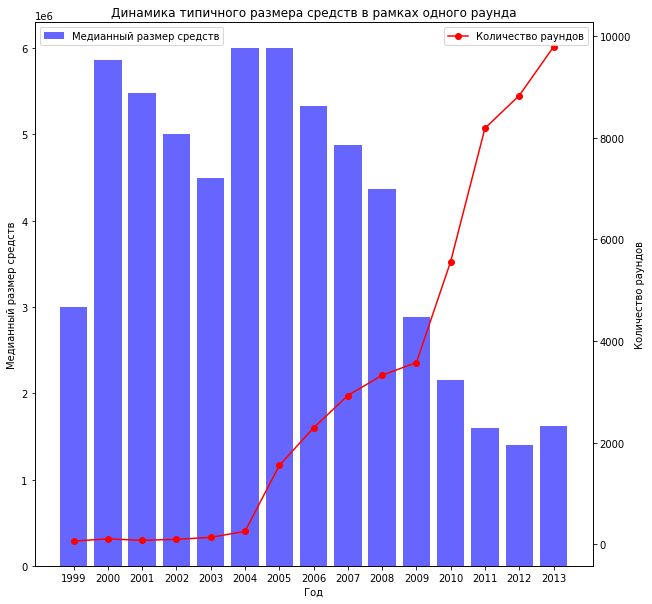

In [33]:
# Построение графиков
fig, ax = plt.subplots(figsize=(10, 10))

# График медианного размера средств
ax.bar(df.index, df['median_raised_amount'], label='Медианный размер средств', color='blue', alpha=0.6)
ax.set_ylabel('Медианный размер средств')
ax.set_xlabel('Год')
ax.set_title('Динамика типичного размера средств в рамках одного раунда')

# Добавление второго y-axes для количества раундов
ax2 = ax.twinx()
ax2.plot(df.index, df['count_raised_amount'], label='Количество раундов', color='red', marker='o')
ax2.set_ylabel('Количество раундов')

# Легенда
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


В 2004 и 2005 году типичный размер собранных в рамках одного раунда средств был максимален(6000000.0).
В 2013 году типичный размер средств 1625500.0, общее количество раундов 9792, то есть наблюдается снижение финансирования и повышение количества раундов.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Обьединим датасеты и разделим компании на группы по количеству сотрудников. 

In [34]:
# Объединим данных по идентификатору сотрудника
merged_df = pd.merge(people_df, education_df, left_on='id',right_on='person_id',how='left')

In [35]:
# Проверка, есть ли информация об образовании
merged_df['has_education'] = merged_df['instituition'].notna()

In [36]:
# Подсчет количества сотрудников в каждой компании
company_group = merged_df.groupby('company_id').agg(
    employee_count=('company_id', 'count'),
    without_education_count=('has_education', lambda x: (~x).sum())
).reset_index()
# Проведем фильтрацию, так как при рассчитывании доли нельзя делить на 0
company_group = company_group.query('employee_count > 0').copy()
company_group

,company_id,employee_count,without_education_count
0,1.0,3,1
1,2.0,1,0
2,3.0,5,1
3,4.0,18,1
4,5.0,84,16
...,...,...,...
22917,285897.0,2,0
22918,285953.0,1,1
22919,285972.0,2,1
22920,285996.0,1,0


<AxesSubplot:xlabel='employee_count', ylabel='count'>

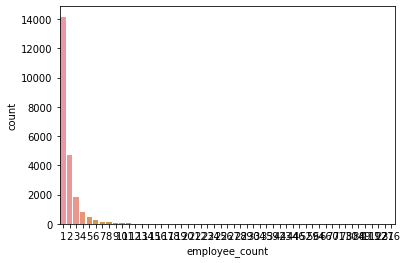

In [37]:
# Посмотрим распределение количества сотрудников на графике
sns.countplot(x='employee_count', data=company_group)

По графику видно, что число компаний с одним сотрудником больше всех остальных. Это можно обьяснить тем, что стартовые компании в начале своего пути содержат малое количество сотрудников. С учетом этого разделим компании на следующие группы: 'Малая'- 1-2 сотрудника, 'Средняя'- 2-10, 'Крупная'- 20-50, 'Очень крупная' - более 50.

In [38]:
# Рассчитываем долю сотрудников без информации об образовании
company_group['share_without_education'] = company_group['without_education_count']/company_group['employee_count']

# Определим границы для группировки по количеству сотрудников
bins = [1, 2, 20, 50, float('inf')]
labels = ['Малая', 'Средняя', 'Крупная', 'Очень крупная']
company_group['size_group'] = pd.cut(company_group['employee_count'], bins=bins, labels=labels, right=False)

# Подсчет средней доли сотрудников без информации об образовании для каждой группы
grouped_results = company_group.groupby('size_group').agg(
    average_share_without_education=('share_without_education', 'mean')
).reset_index()

# Вывод результатов
print("\nСредняя доля сотрудников без информации об образовании по группам:")
print(grouped_results)



Средняя доля сотрудников без информации об образовании по группам:
      size_group  average_share_without_education
0          Малая                         0.592862
1        Средняя                         0.243082
2        Крупная                         0.214276
3  Очень крупная                         0.183592


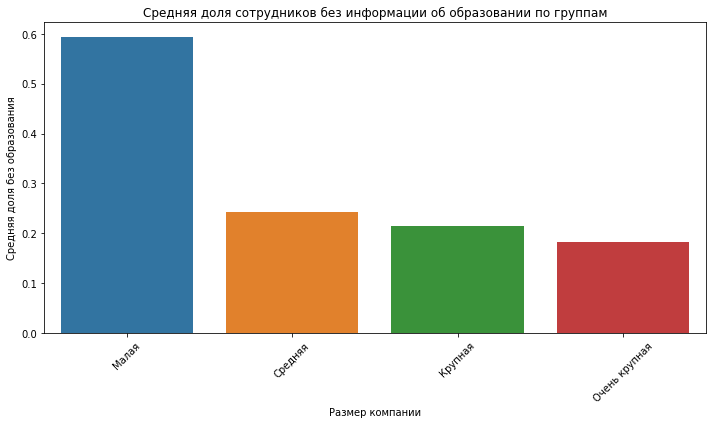

In [39]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='size_group', y='average_share_without_education', data=grouped_results)
plt.title('Средняя доля сотрудников без информации об образовании по группам')
plt.xlabel('Размер компании')
plt.ylabel('Средняя доля без образования')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Почти у 60% сотрудников отсутстует информация об образовании в малых компаниях.Чем крупнее компания, тем больше информации о сотрудниках.

 Возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу degrees.csv? Да, возможно, так как все три таблицы содержат идентификатор сотрудника ( people[id] , education[person_id] , degrees[object_id] ) С помощью данной таблицы мы сможем узнать еще и тип образования и специальность сотрудника. В рамках данной задачи нет в этом необходимости.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [40]:
# Найдем уникальные значения.Это поможет понять,
# сколько уникальных имен пользователей существует в каждом датасете и есть ли пересечения.
unique_users_car = company_and_rounds_df['network_username'].nunique()
unique_users_people = people_df['network_username'].nunique()
unique_users_fund = fund_df['network_username'].nunique()

display(f"Уникальные usernames в company_and_rounds_df: {unique_users_car}")
display(f"Уникальные usernames в people_df: {unique_users_people}")
display(f"Уникальные usernames в fund_df: {unique_users_fund}")


# Проверим дубликаты в каждом датасете
duplicates_car = company_and_rounds_df['network_username'].duplicated(keep=False).sum()
duplicates_people = people_df['network_username'].duplicated(keep=False).sum()
duplicates_fund = fund_df['network_username'].duplicated(keep=False).sum()

display(f"Количество дубликатов в company_and_rounds_df: {duplicates_car}")
display(f"Количество дубликатов в people_df: {duplicates_people}")
display(f"Количество дубликатов в fund_df: {duplicates_fund}")

# Определим пересечения
intersection1 = set(company_and_rounds_df['network_username']).intersection(set(people_df['network_username']))
display(f"Количество общих usernames: {len(intersection1)}")
intersection2 = set(people_df['network_username']).intersection(set(people_df['network_username']))
display(f"Количество общих usernames: {len(intersection2)}")
intersection3 = set(fund_df['network_username']).intersection(set(company_and_rounds_df['network_username']))
display(f"Количество общих usernames: {len(intersection3)}")


# Посчитаем частоту дублирования
frequency_car = company_and_rounds_df['network_username'].value_counts()
frequency_people = people_df['network_username'].value_counts()
frequency_fund = fund_df['network_username'].value_counts()

display("\nЧастота дублирования usernames в company_and_rounds_df:")
display(frequency_car)

display("\nЧастота дублирования usernames в people_df:")
display(frequency_people)

display("\nЧастота дублирования usernames в fund_df:")
display(frequency_car)

'Уникальные usernames в company_and_rounds_df: 79571'

'Уникальные usernames в people_df: 38421'

'Уникальные usernames в fund_df: 2098'

'Количество дубликатов в company_and_rounds_df: 146612'

'Количество дубликатов в people_df: 188713'

'Количество дубликатов в fund_df: 9597'

'Количество общих usernames: 2200'

'Количество общих usernames: 38422'

'Количество общих usernames: 71'

'\nЧастота дублирования usernames в company_and_rounds_df:'

Goodman_UK       20
IndiaMART        17
tyropayments     15
mobivery         15
AviirLabs        14
                 ..
ibottaapp         1
xenoone           1
civicinsight      1
findmycarrots     1
justbukit         1
Name: network_username, Length: 79571, dtype: int64

'\nЧастота дублирования usernames в people_df:'

iWatchLife        6
chrislogan        5
ConnectAndSell    4
firstscribe       4
xorduna           3
                 ..
Summit_Rider      1
gregbayer         1
maxgutman         1
JZ47              1
jcreuze           1
Name: network_username, Length: 38421, dtype: int64

'\nЧастота дублирования usernames в fund_df:'

Goodman_UK       20
IndiaMART        17
tyropayments     15
mobivery         15
AviirLabs        14
                 ..
ibottaapp         1
xenoone           1
civicinsight      1
findmycarrots     1
justbukit         1
Name: network_username, Length: 79571, dtype: int64

 После проведенной работы можно сделать вывод, что столбец network_username содержит множество дубликатов или уникальных значений, которые не пересекаются между датасетами, это может привести к проблемам при объединении.

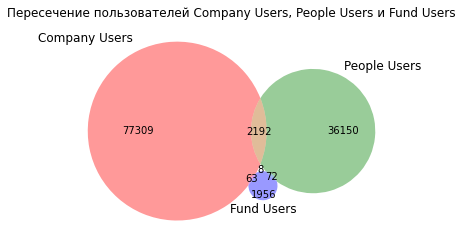

In [41]:
# Строим диаграмму Венна
venn3([set(company_and_rounds_df['network_username']), set(people_df['network_username']), set(fund_df['network_username'])], set_labels=('Company Users','People Users','Fund Users'))

# Отображаем график
plt.title("Пересечение пользователей Company Users, People Users и Fund Users")
plt.show()    


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Причина возникновения большого количества пропусков в том, что в датафрейме company_and_rounds_df соединены две таблицы. Разделим их на два датафрейма: с информацией о компаниях и с информацией о раундах финансирования.

In [42]:
# Выведем столбцы датафрейма
company_and_rounds_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'year'],
      dtype='object')

In [43]:
# Создаем датафрейм company из левой части таблицы
company = company_and_rounds_df.iloc[:,0:13]
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [44]:
# Создаем датафрейм rounds из левой части таблицы
rounds = company_and_rounds_df.iloc[:,13:22]
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


In [45]:
# Проверим датафрейм company на дубликаты
company.duplicated().sum()

21220

In [46]:
# Удалим дубликаты в датафрейме company
company = company.drop_duplicates()

In [47]:
# Проверим датафрейм rounds на дубликаты
rounds.duplicated().sum()

164845

In [48]:
# Удалим дубликаты в датафрейме rounds
rounds = rounds.drop_duplicates()

In [49]:
# Отсортируем датафреймы по возрастанию идентификатора компании и сбросим индексы.
company_df=company.sort_values(by='company_ID').reset_index(drop=True)
rounds_df=rounds.sort_values(by='company_id').reset_index(drop=True)

In [50]:
# Выведем информацию  после удаления дубликатов
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [51]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52929 entries, 0 to 52928
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.6+ MB


По проделанной работе можно сделать вывод, что получилось вернуть сложный датафрейм в первоначальное состояние и очистить от дубликатов. Данные готовы к анализу.


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [52]:
# Выберем только те компании, у которых указаны значения funding_rounds
# или investment_rounds больше нуля, или те, у которых в колонке status указано acquired
new_company_df=company_df[((company_df['funding_rounds']>0)|
                   (company_df['investment_rounds']>0))|
                   (company_df['status']=='acquired')]

In [53]:
# Обьединим новый датафрейм с информацией о покупках
connect_df = pd.merge(new_company_df, acquisition_df, left_on='company_ID',right_on='acquired_company_id',how='left')
connect_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

В данном пункте мы отобрали только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired. В результирующей таблице получилось 40747 тысяч компаний. После мы к таблице о компаниях присоедини таблицу об содержфщей информацию о покупках одними компаниями других компаний.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [54]:
# Выведем статистические показатели, цифры формата float выводим с разделителем групп разрядов
pd.set_option('display.float_format','{:,.2f}'.format)
connect_df['funding_total'].describe()



count          40,890.00
mean       10,135,585.95
std        56,412,886.91
min                 0.00
25%                 0.00
50%           600,000.00
75%         5,631,320.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

По показателям видим, что очень большой размах данных. Также по минимальным значениям можно сделать вывод, что есть покупки за 0 рублей. Это может указывать на то, что некоторые стартапы не получили финансирования вообще. Среднее значение и медиана сильно разнятся, это тоже говорит о наличии выбросов.

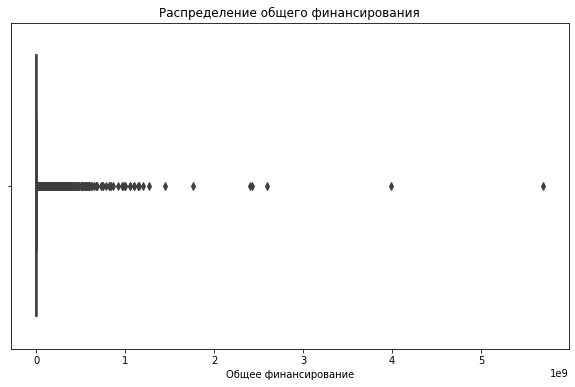

In [55]:
# Визуализируем распределение данных
plt.figure(figsize=(10, 6))
sns.boxplot(x=connect_df['funding_total'])
plt.title("Распределение общего финансирования")
plt.xlabel("Общее финансирование")
plt.show()


По графику видим очень большие выбросы. Посмотрим на данные без выбросов.

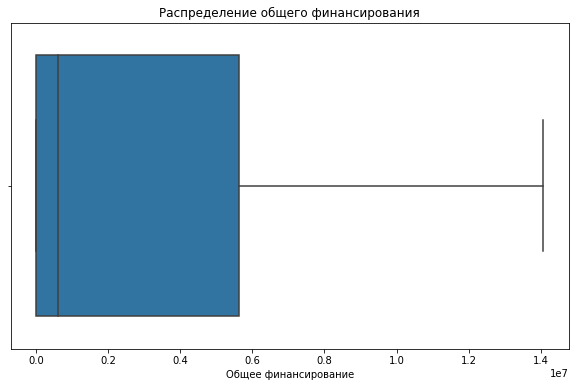

In [56]:
# Визуализируем распределение общего финансирования
plt.figure(figsize=(10, 6))
sns.boxplot(x=connect_df['funding_total'], showfliers=False)
plt.title("Распределение общего финансирования")
plt.xlabel("Общее финансирование")
plt.show()


Ящик расположен несимметрично, данные неравномерны. Типичное значение расположено от 0 до 6 млн долларов.

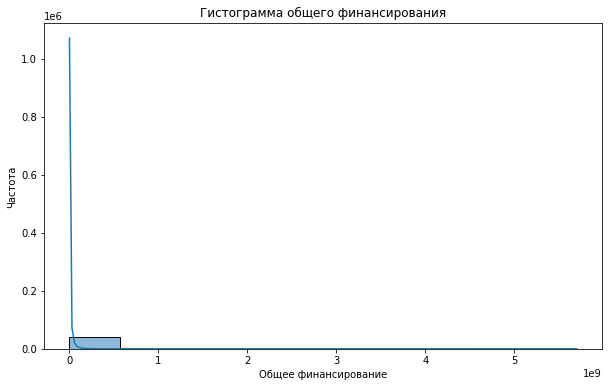

In [57]:
# Гистограмма распределения
plt.figure(figsize=(10, 6))
sns.histplot(connect_df['funding_total'], bins=10, kde=True)
plt.title("Гистограмма общего финансирования")
plt.xlabel("Общее финансирование")
plt.ylabel("Частота")
plt.show()

В результате анализа мы можем сделать вывод о том, что  в случае наличия выбросов использование медианы и квартилей для оценки типичных значений в данных о финансировании компаний является более надежным подходом.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [58]:
# Фильтрация компаний, которые были проданы за 0 или 1 доллар и имеют ненулевой общий объем финансирования
filtered_companies = connect_df[(connect_df['price_amount'].isin([0, 1])) & (connect_df['funding_total'] > 0)]

# Заменяем все отрицательные значения в столбце funding_total на 0
filtered_companies['funding_total'] = filtered_companies['funding_total'].clip(lower=0)

# Рассчет верхней и нижней границы выбросов для столбца funding_total
Q1 = filtered_companies['funding_total'].quantile(0.25)
Q3 = filtered_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Нижняя и верхняя границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Определение процентилей
lower_percentile = round(filtered_companies['funding_total'].le(lower_bound).mean() * 100)
upper_percentile = round(filtered_companies['funding_total'].le(upper_bound).mean() * 100)


display("\nРезультаты:")
display(f"Нижняя граница выбросов: {lower_bound} (25-й процентиль: {Q1})")
display(f"Верхняя граница выбросов: {upper_bound} (75-й процентиль: {Q3})")

display(f"Нижняя граница выбросов соответствует: {lower_percentile}-ому процентилю")
display(f"Верхняя граница выбросов соответствует: {upper_percentile}-ому процентилю")
    

'\nРезультаты:'

'Нижняя граница выбросов: -18250000.0 (25-й процентиль: 2000000.0)'

'Верхняя граница выбросов: 35750000.0 (75-й процентиль: 15500000.0)'

'Нижняя граница выбросов соответствует: 0-ому процентилю'

'Верхняя граница выбросов соответствует: 91-ому процентилю'

 Мминимальное значение в нашем наборе данных — это 0. Это может быть связано с тем, что некоторые компании не получили финансирования вообще. Значения, которые превышают верхнюю границу выбросов, могут считаться аномальными и требуют дальнейшего анализа. Это может быть связано с тем, что некоторые стартапы получили очень высокое финансирование, что делает их особенно интересными для инвесторов, но также и рискованными.



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [59]:
# Cруппируем стартапы по категориям и рассчитаем средние цены покупки, разброс и количество
# При этом отберем категории, количество компаний которых превышает 5 
category_stats = (connect_df.groupby('category_code')['price_amount']
                 .agg(['median','std','count'])
                 .query('count>=5')
                 .sort_values(by='median',ascending=False))
# Выведем топ-5 категорий по медианному финансированию
category_stats.head(5)

,median,std,count
category_code,,,
manufacturing,"72,000,000.00","969,657,968.02",29
real_estate,"50,000,000.00","2,505,122,913.06",7
automotive,"43,000,000.00","2,297,757,559.01",5
biotech,"13,200,000.00","1,540,373,521.41",454
hospitality,"12,500,000.00","651,449,440.58",11


Выбор 5 топ категорий позволяет нам сосредоточиться на верхней части данных. Это позволяет выделить категории, которые имеют значительно высокие цены по сравнению с остальными.
- Мы ищем категории со средними ценами, которые находятся в топ-5, чтобы выделить только те, которые действительно могут быть интересны крупным инвесторам.

- Стандартное отклонение помогает понять, насколько сильно варьируются цены в рамках каждой категории. Высокий разброс может указывать на наличие как очень дорогих, так и более дешевых стартапов в одной категории, что может быть привлекательным для инвесторов, готовых к риску.

- Эти категории могут быть интересны для крупных инвесторов, поскольку они могут иметь потенциал для значительного роста и прибыли, несмотря на высокий риск, связанный с возможными колебаниями в ценах.



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [60]:
# Группировка по статусу стартапа и расчет среднего количества раундов финансирования
average_rounds = connect_df.groupby('status')['funding_rounds'].mean().reset_index()

# Печать результатов
display("Среднее количество раундов финансирования по статусу стартапа:")
display(average_rounds)


'Среднее количество раундов финансирования по статусу стартапа:'

,status,funding_rounds
0,acquired,0.53
1,closed,1.38
2,ipo,1.93
3,operating,1.52


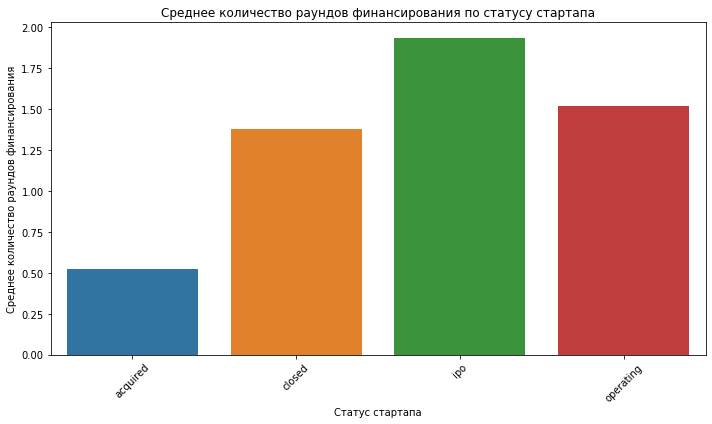

In [61]:
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_rounds', data=average_rounds)
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

После выполнения анализа и визуализации мы сможем сделать выводы о том, как статус стартапа влияет на количество раундов финансирования:

- Стартапы, которые вышли на ipo и действующие стартапы имеют большее среднее количество раундов финансирования, так как они продолжают привлекать инвестиции.
- Закрытые стартапы также показывают меньшее количество раундов, так как они могли не привлечь достаточное количество инвестиций для продолжения работы.
- Приобретенные стартапы могут иметь меньшее среднее количество раундов, так как их финансирование могло быть завершено после приобретения.


## Шаг 4. Итоговый вывод и рекомендации

Подводя итоги, опишем, что было сделано в проекте.
- Загрузили все данные по проекту.Проверили названия столбцов. Вывели информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов. Обнаружили большое количество пропусков, несоответствие типов данных. Пропуски решили оставить без изменений, дабы избежать искажения анализа. 
- Обработали типы данных в столбцах, которые хранят значения даты и времени.
- Составили сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
    Ответили на вопрос заказщика и выяснили, что в 2004 и 2005 году типичный размер собранных в рамках одного раунда средств был максимален(6000000.0). В 2013 году типичный размер средств составил 1625500.0, общее количество раундов 9792. Наблюдается снижение финансирования за раунд, суммарно инвестирование увеличивается. Можно так охарактеризовать тенденции: очень много стало мелких стартапов, которые активно финансируется, вот поэтому с одной стороны рост раундов, и рост суммарных инвестиций, а с другой стороны снижение raised_amount.
- Используя датасеты people.csv и education.csv, разделили все компании на несколько групп по количеству сотрудников и оценили среднюю долю сотрудников без информации об образовании в каждой из групп. Почти у 60% сотрудников отсутстует информация об образовании в малых компаниях. Чем крупнее компания, тем больше информации о сотрудниках.
- Установили, что столбец network_username, который встречается в нескольких датасетах, из-за значений, которые не пересекаются между датасетами, неподходит для объединения.
- Выяснили, что причина возникновения большого количества пропусков в том, что в датафрейме company_and_rounds_df соединены две таблицы, разделили их. В датасете привели данные в вид, который позволил в дальнейшем проводить анализ в разрезе отдельных компаний.
- Оценили какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Типичное значение расположено от 0 до 6 млн долларов. Остальные значения можно считать выбивающимися.
- Исследовали компании, которые были проданы за ноль или за один доллар, и при этом у них был ненулевой общий объём финансирования. Это может быть связано с тем, что некоторые компании не получили финансирования вообще. Значения, которые превышают верхнюю границу выбросов, могут считаться аномальными и требуют дальнейшего анализа. Это может быть связано с тем, что некоторые стартапы получили очень высокое финансирование, что делает их особенно интересными для инвесторов, но также и рискованными.
- Рассчитали аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и указали, каким процентилям границы соответствуют.
- Среди категорий стартапов выделили топ-5 категории стартапов, характеризующиеся типично высокими ценами и наибольшим разбросом цен за стартап.Это следующие категории:
    - manufacturing	72,000,000.00;    969,657,968.02	
    - real_estate	50,000,000.00;	2,505,122,913.06	
    - automotive	43,000,000.00;	2,297,757,559.01	
    - biotech	    13,200,000.00;  1,540,373,521.41	
    - hospitality	12,500,000.00;	  651,449,440.58	
- Исследовали типичное значение количества раундов для каждого возможного статуса стартапа.Выяснили как статус стартапа влияет на количество раундов финансирования:
    - Стартапы, которые вышли на ipo и действующие стартапы имеют большее среднее количество раундов финансирования, так как они продолжают привлекать инвестиции.
    - Закрытые стартапы также показывают меньшее количество раундов, так как они могли не привлечь достаточное количество инвестиций для продолжения работы.
    - Приобретенные стартапы могут иметь меньшее среднее количество раундов, так как их финансирование могло быть завершено после приобретения.


На основании проведенного анализа и полученных результатов, можно сформулировать следующие рекомендации для заказчика

1. Обращение к малым компаниям:
  - Учитывая, что почти 60% сотрудников в малых компаниях не имеют информации об образовании, рекомендуется рассмотреть возможность улучшения процессов сбора и хранения данных о сотрудниках. Это может помочь в дальнейшем анализе и принятии более обоснованных решений на основе данных о квалификации работников.
2. Инвестиции в стартапы с высоким потенциалом:
  - Топ-5 категорий стартапов, характеризующиеся высокими ценами и значительным разбросом, представляют собой отличные возможности для инвестиций. Рекомендуется сосредоточиться на этих категориях (manufacturing, real_estate, automotive, biotech, hospitality), так как они могут предложить высокий потенциал возврата инвестиций, несмотря на риски.
3. Анализ стартапов с аномальным финансированием:
  - Стартапы, которые были проданы за 0 или 1 доллар, но имели ненулевой общий объем финансирования, требуют дополнительного анализа. Это может помочь выявить причины таких сделок и определить, как эти компании могли получить финансирование. Понимание этих факторов поможет избежать ошибок в будущих инвестиционных решениях.
4. Мониторинг трендов в финансировании:
  - Обратите внимание на тенденцию к увеличению количества мелких стартапов и росту общего финансирования. Это может указывать на изменение инвестиционных стратегий. Рекомендуется следить за изменениями в количестве раундов финансирования и типичным размером средств, чтобы адаптировать свои инвестиционные стратегии.




